In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import folium

%matplotlib inline

#About the dataset

The data collected as of: 01.04.2023

Register of charging points Federal Network Agency

Note:
The list includes the charging facilities of all operators who have fully completed the notification procedure of the Federal Network Agency and who have and have agreed to publication on the Internet. The number of publicly accessible charging facilities in Germany is therefore larger than shown here.

In [ ]:
# load the csv file into a pandas data frame
df_ev_data = pd.read_csv('data/Ladesaeulenregister_csv.csv',skiprows=11)

# visualize first 5 rows
df_ev_data.head()

<ipython-input-82-fb52c9dcf356>:2: DtypeWarning: Columns (11,18,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ev_data = pd.read_csv('/content/drive/Othercomputers/My Laptop/Studies/MASTERS/Semester_1/Data science/Project/Optimal-EV-charging-stations/Data/Ladesaeulenregister_csv.csv',skiprows=11)


,Operator,Street,House Number,Address Supplement,Postal Code,City,State,District/Landkreis,Latitude,Longitude,...,Public Key 1,Connector Type 2,Power Level 2 [kW],Public Key 2,Connector Type 3,Power Level 3 [kW],Public Key 3,Connector Type 4,Power Level 4 [kW],Public Key 4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.442398,9.659075,...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,smopi®,Albstraße,14,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.449353,9.672201,...,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22.0,NaN,AC Steckdose Typ 2,22,NaN
2,Albwerk GmbH & Co. KG,Parkplatz Campingplatz,0,NaN,72589,Westerheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.5105,9.609,...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EnBW mobility+ AG und Co.KG,Hauptstraße,91c,NaN,73340,Amstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.5785342,9.8748399,...,NaN,"DC Kupplung Combo, DC CHAdeMO",50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,SWU Energie GmbH,Sterngasse,6,NaN,88481,Balzheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.179959,10.076977,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_ev_data["Charging Station Type"].unique()

array(['Normalladeeinrichtung', 'Schnellladeeinrichtung'], dtype=object)

In [ ]:

# unique elements of the column type_of_charger
df_ev_data["Charging Station Type"].unique()
# array(['Schnellladeeinrichtung', 'Normalladeeinrichtung'], dtype=object)

# modify entries of the column type_of_charger
df_ev_data["Charging Station Type"].replace({'Schnellladeeinrichtung': 'Fast-charging device', 'Normalladeeinrichtung': 'Standard charging device'}, inplace=True)

In [ ]:
df_ev_data["Charging Station Type"]

0        Standard charging device
1        Standard charging device
2        Standard charging device
3            Fast-charging device
4        Standard charging device
                   ...           
44222    Standard charging device
44223        Fast-charging device
44224        Fast-charging device
44225    Standard charging device
44226    Standard charging device
Name: Charging Station Type, Length: 44227, dtype: object

# Exploratory data analysis and data cleaning

In [ ]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44227 entries, 0 to 44226
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Operator                   44227 non-null  object 
 1   Street                     44227 non-null  object 
 2   House Number               44227 non-null  object 
 3   Address Supplement         6292 non-null   object 
 4   Postal Code                44227 non-null  int64  
 5   City                       44227 non-null  object 
 6   State                      44227 non-null  object 
 7   District/Landkreis         44227 non-null  object 
 8   Latitude                   44227 non-null  object 
 9   Longitude                  44227 non-null  object 
 10  Commissioning Date         44227 non-null  object 
 11  Connection Power           44227 non-null  object 
 12  Charging Station Type      44227 non-null  object 
 13  Number of Charging Points  44227 non-null  int

Replacing null values for the columns "Connector Type" (2,3,4), "Power Level" (2,3,4) [kW], and "Address Supplement" to string '0'.

In [ ]:
columns_na = ['Connector Type 2', 'Power Level 2 [kW]', 'Connector Type 3', 'Power Level 3 [kW]', 'Connector Type 4', 'Power Level 4 [kW]', "Address Supplement"]

for column in columns_na:
    df_ev_data[column] = df_ev_data[column].fillna(value='0')

Removing columns that are not providing useful information, for example, "Public Key"

In [ ]:
# drop public key columns
df_ev_data.drop(columns=['Public Key 1', 'Public Key 2', 'Public Key 3', 'Public Key 4'], inplace=True)

In [ ]:
df_ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44227 entries, 0 to 44226
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Operator                   44227 non-null  object
 1   Street                     44227 non-null  object
 2   House Number               44227 non-null  object
 3   Address Supplement         44227 non-null  object
 4   Postal Code                44227 non-null  int64 
 5   City                       44227 non-null  object
 6   State                      44227 non-null  object
 7   District/Landkreis         44227 non-null  object
 8   Latitude                   44227 non-null  object
 9   Longitude                  44227 non-null  object
 10  Commissioning Date         44227 non-null  object
 11  Connection Power           44227 non-null  object
 12  Charging Station Type      44227 non-null  object
 13  Number of Charging Points  44227 non-null  int64 
 14  Connec

In [ ]:
# check if there are null values
df_ev_data.isnull().sum().sum()
# 0

0

As shown above, some of the columns are of data type object instead of float. Convert the data type of these columns to float, replacing previously commas with dots.

In [ ]:
# convert the data type of these columns to float
columns_modify =  ['Longitude', 'Latitude']

for column in columns_modify:
    df_ev_data[column] = df_ev_data[column].astype('str').str.replace(",", ".", 1).str.replace(",", "").astype('float')



### Explanation of the cleaned dataset

We have in total 42995 rows with 22 columns.

**Columns regarding the location of the EV stations are:**


*   Street
*   House Number
*   Address Supplement
*   Postal Code
*   City
*   State
*   District/Landkreis
*   Latitude
*   Longitude

**Columns regarding EV stations, e.g., operator, types of charging:**

*   Operator
*   Commissioning Date
*   Connection Power
*   Charging Station Type
*   Number of Charging Points
*   Connector Type 1,2,3,4
*   Power Level 1,2,3,4 [kW]

## Number of charging stations by *state*

The plot shows that Bavaria (Bayern) state has the highest number of EV charging stations of about 9281. The state of Bremen has the lowest number of EV charging stations of about 293.

In [ ]:
df_ev_data.State.value_counts()

Bayern                    9424
Nordrhein-Westfalen       8197
Baden-Württemberg         7713
Niedersachsen             4439
Hessen                    3269
Sachsen                   1777
Schleswig-Holstein        1677
Rheinland-Pfalz           1636
Berlin                    1470
Hamburg                   1096
Brandenburg                886
Thüringen                  796
Sachsen-Anhalt             679
Mecklenburg-Vorpommern     535
Saarland                   335
Bremen                     298
Name: State, dtype: int64

<ipython-input-93-5a8cca4993b6>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


Text(0, 0.5, 'Number')

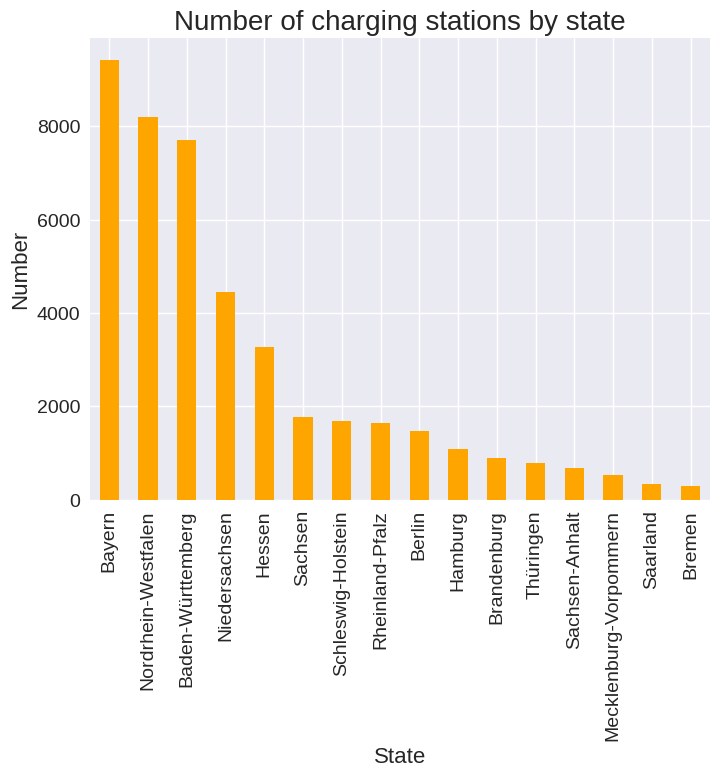

In [ ]:
plt.style.use('seaborn')

# number of charging station per state
df_ev_data.State.value_counts().plot(kind='bar', color='orange', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of charging stations by state', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

## Number of charging stations by *cities*

The plot shows that the city of München has the highest number of EV charging stations, in total, 1476. Followed by the largest city in Germany, Berlin.

In [ ]:
df_ev_data.City.value_counts().head(10)


München                1473
Berlin                 1448
Hamburg                1089
Stuttgart               883
Düsseldorf              585
Hannover                535
Dortmund                491
Köln                    474
Ingolstadt              462
Rüsselsheim am Main     413
Name: City, dtype: int64

Text(0, 0.5, 'Number')

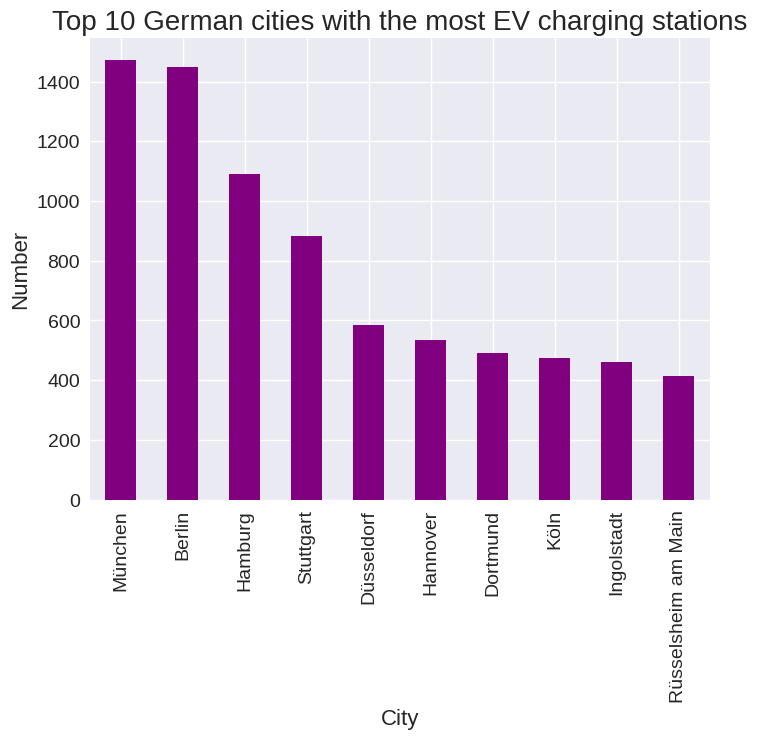

In [ ]:
# top 10 German cities with the most EV charging stations
df_ev_data.City.value_counts().head(10).plot(kind='bar', color='purple', figsize=(8,6))

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Top 10 German cities with the most EV charging stations', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number', fontsize=16)

## Types of charging stations of top 10 cities with the most number of EVs

Charging stations types that exists are: Standard charging device , Fast-charging device.

In [ ]:
new_df=df_ev_data[["City","Charging Station Type"]]
counts_of_charging_types=new_df.value_counts()
top_ten_cities=df_ev_data.City.value_counts().head(10)

data={'Standard':[],
      'Fast':[]}
for i in top_ten_cities.index:
  # print(i)
  # print(top_ten_cities[i])
  x=counts_of_charging_types[i]
  if len(x.index)==2:
      data['Standard'].append(x["Standard charging device"])
      data['Fast'].append(x["Fast-charging device"])
  else:
    if "Standard charging device" in x.index:
      data['Standard'].append(x["Standard charging device"])
    else:
       data['Standard'].append(0)
    if "Fast-charging device" in x.index:
      data['Fast'].append(x["Fast-charging device"])
    else:
       data['Fast'].append(0)

  # print(x)


In [ ]:
charging_types_df = pd.DataFrame(data,columns=['Standard','Fast'], index = top_ten_cities.index)

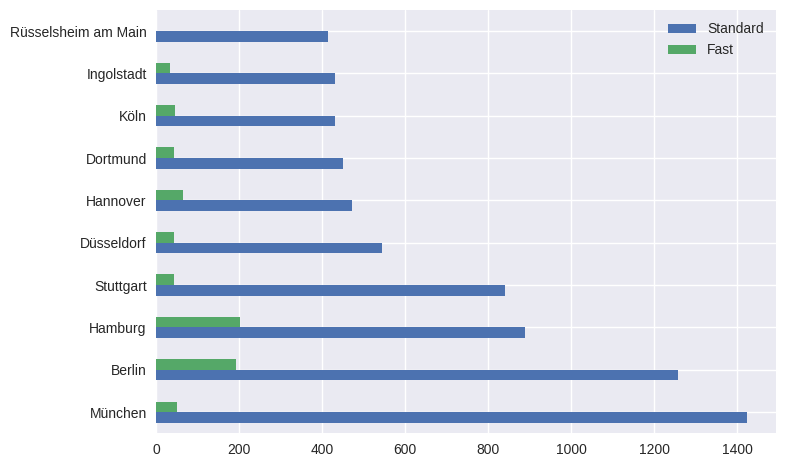

In [ ]:
charging_types_df.plot.barh()
plt.show()

As observed, the ratio of standard and fast charging station types is very far apart for the city of München, with the largest number of EVs in the country.

For the city of Rüsselsheim am Main, there doesn't exist any fast charging stations.

Relatively, it was observed, that for large and busy cities like Berlin and Hamburg the ratio between fast and standard charging stations is much closer as compared to other cities.

## Charging stations commisioned dates

The plot shows how many charging stations were put into operation each year. As observed, for the past decade there has been a huge increase in the establishment of the EV charging stations.
For the year 2023, the data is collected till the month of March.

In [ ]:
# convert the column commissioning_date to datetime
df_ev_data['Commissioning Date'] = pd.to_datetime(df_ev_data['Commissioning Date'], format='%d-%m-%Y')


Text(0, 0.5, 'Number')

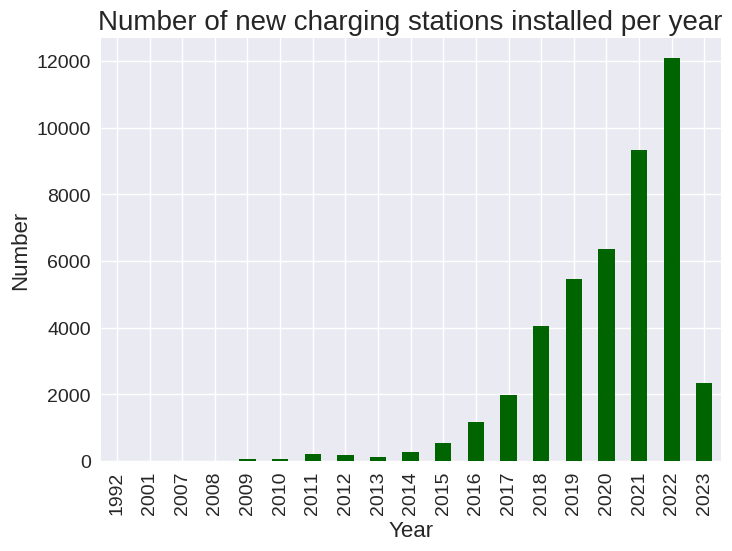

In [ ]:
# number of new charging stations installed per year
df_ev_data['Commissioning Date'].dt.year.value_counts().sort_index().plot(kind='bar', color='darkgreen')

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of new charging stations installed per year',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number',fontsize=16)

## Total number of EV charging stations in operation for the top 10 largest cities of Germany

In [ ]:
# the most populated cities in Germany
biggest_cities = ['Berlin', 'Hamburg', 'München', 'Köln', 'Frankfurt am Main', 'Stuttgart', 'Düsseldorf', 'Dortmund', 'Essen', 'Leipzig']
# biggest_cities = df_ev_data.City.value_counts().head(10)
# group by date and city
date_city_group_by = df_ev_data.groupby([df_ev_data['Commissioning Date'].dt.year, 'City']).count()

# select a column and move the innermost level of the index to the columns
date_cities = date_city_group_by.Operator.unstack()

# select the most populated cities in germany
date_cities_10 = date_cities[biggest_cities]

date_cities_10

City,Berlin,Hamburg,München,Köln,Frankfurt am Main,Stuttgart,Düsseldorf,Dortmund,Essen,Leipzig
Commissioning Date,,,,,,,,,,
1992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,23.0,NaN,NaN,NaN,4.0,NaN,NaN,8.0,13.0,NaN
2010,14.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,NaN
2011,23.0,NaN,NaN,NaN,NaN,NaN,6.0,18.0,12.0,NaN
2012,21.0,NaN,NaN,NaN,NaN,NaN,1.0,12.0,NaN,NaN
2013,NaN,NaN,NaN,8.0,NaN,NaN,1.0,7.0,NaN,3.0


Text(0, 0.5, 'Number')

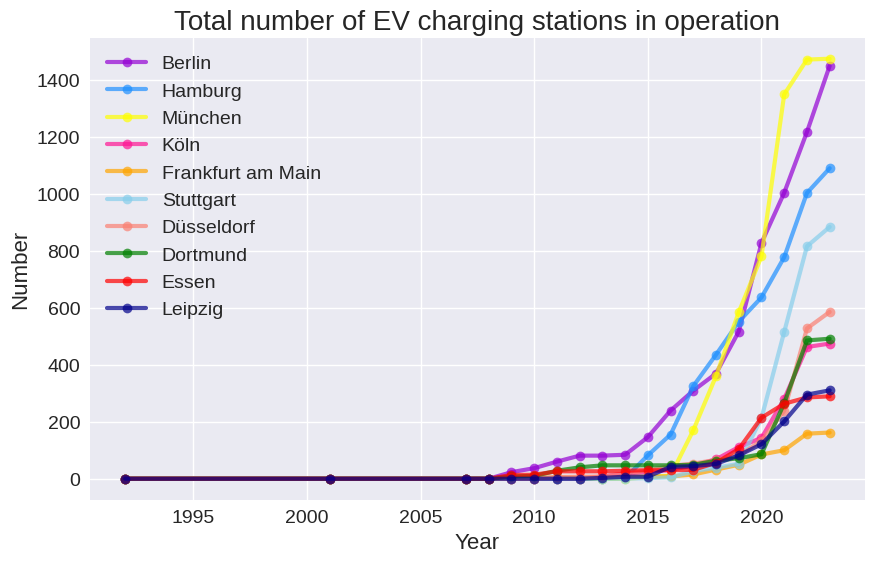

In [ ]:
# define the colors for the line plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# line plot showing the total number of EV charging station in operation over the years
date_cities_10.fillna(0.0).cumsum().plot(color=colors, marker='o', alpha=0.7, linewidth=3, figsize=(10,6))

# modify the ticks and the legend
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)

# define the title and the labels
plt.title('Total number of EV charging stations in operation', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)

As observed, the total number of charging stations in München and Berlin grows more rapidly than Frankfurt, Leipzig and other cities within the last decade

## Number of Charging points across cities

<Axes: ylabel='Number of Charging Points'>

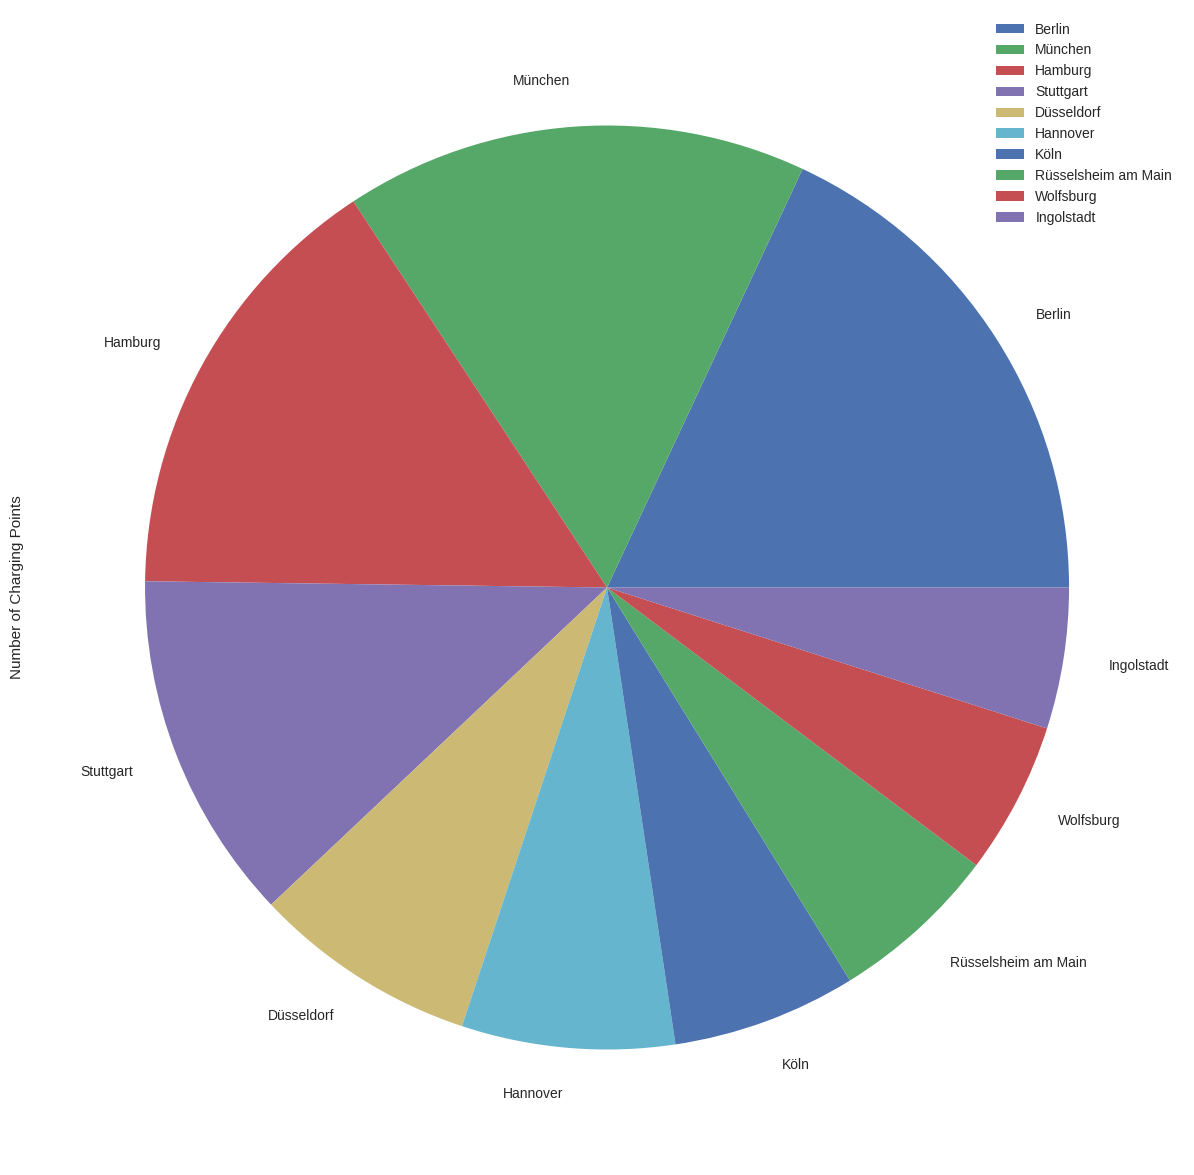

In [ ]:
num_charging_points = df_ev_data[["City","Number of Charging Points"]]
num_charging_points = num_charging_points.groupby(["City"]).sum()

num_charging_points.sort_values(by='Number of Charging Points', ascending=False).head(10).plot.pie(y='Number of Charging Points', figsize=(15, 15))

In [ ]:
num_charging_points.sort_values(by='Number of Charging Points', ascending=False).head(10)

,Number of Charging Points
City,
Berlin,2516
München,2260
Hamburg,2166
Stuttgart,1709
Düsseldorf,1098
Hannover,1039
Köln,899
Rüsselsheim am Main,826
Wolfsburg,743


## Number of charging points at top 10 cities with the most number of EVs

In [ ]:
top_ten_cities=df_ev_data.City.value_counts().head(10)

In [ ]:
num_charging_points = df_ev_data[["City","Number of Charging Points"]]


City     Number of Charging Points
München  1                            731
         2                            715
         4                             18
         3                              9
dtype: int64


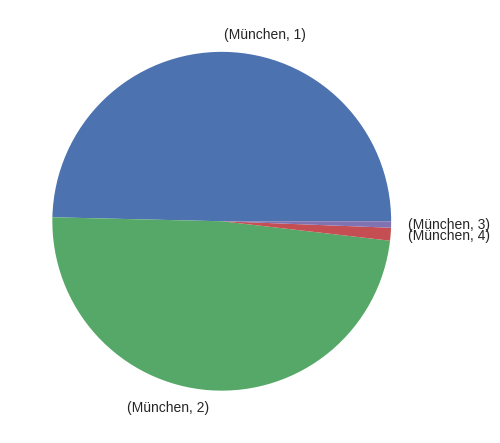

City    Number of Charging Points
Berlin  2                            881
        1                            491
        3                             41
        4                             35
dtype: int64


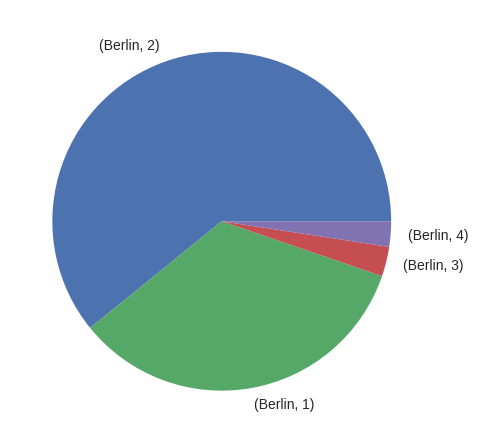

City     Number of Charging Points
Hamburg  2                            952
         1                             86
         3                             28
         4                             23
dtype: int64


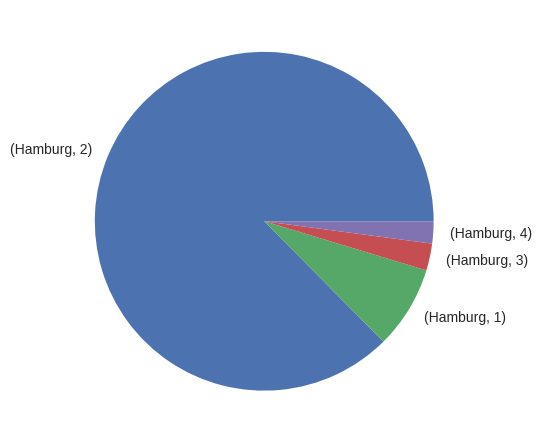

City       Number of Charging Points
Stuttgart  2                            715
           1                            129
           4                             33
           3                              6
dtype: int64


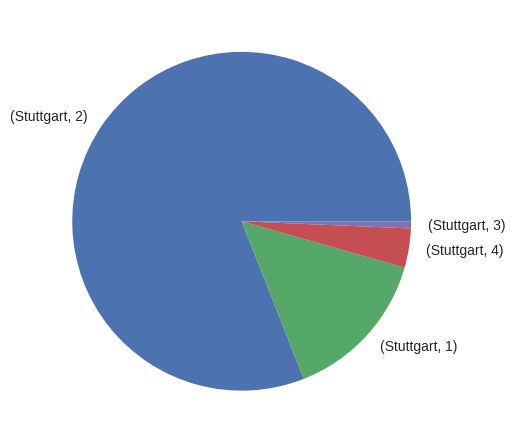

City        Number of Charging Points
Düsseldorf  2                            430
            1                            126
            4                             25
            3                              4
dtype: int64


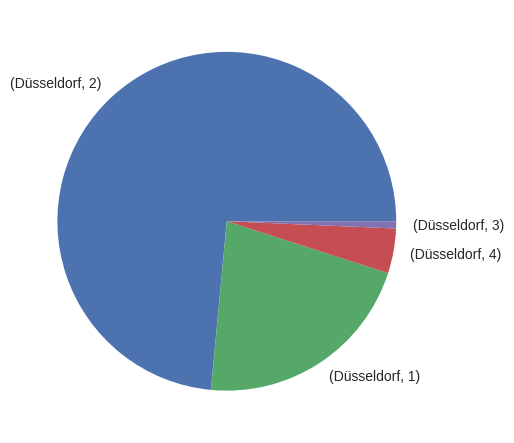

City      Number of Charging Points
Hannover  2                            458
          1                             60
          4                             12
          3                              5
dtype: int64


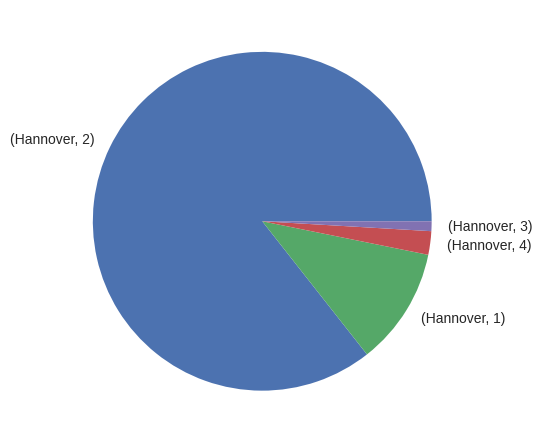

City      Number of Charging Points
Dortmund  1                            363
          2                            116
          4                              9
          3                              3
dtype: int64


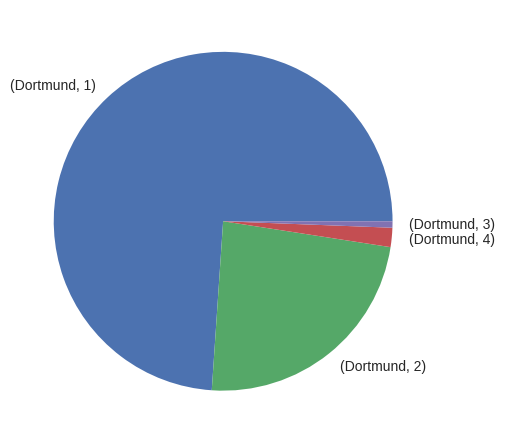

City  Number of Charging Points
Köln  2                            376
      1                             78
      3                             11
      4                              9
dtype: int64


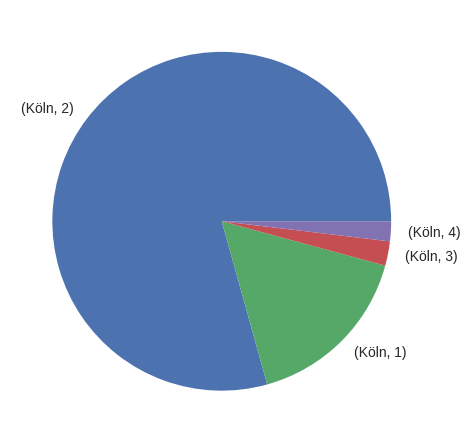

City        Number of Charging Points
Ingolstadt  1                            243
            2                            213
            3                              5
            4                              1
dtype: int64


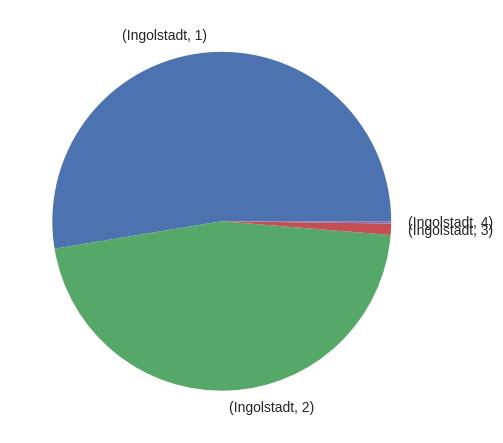

City                 Number of Charging Points
Rüsselsheim am Main  2                            413
dtype: int64


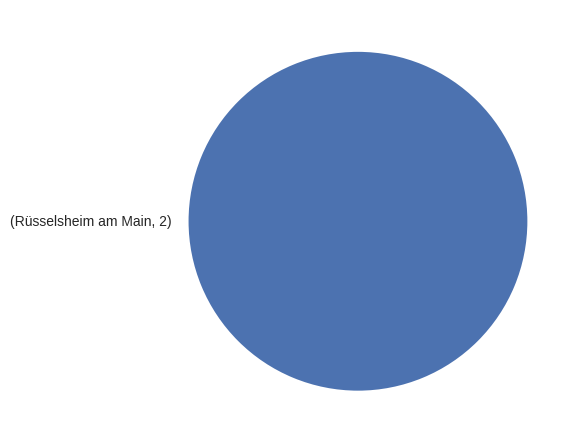

In [ ]:
for i in top_ten_cities.index:
  x=num_charging_points[num_charging_points['City'] == i].value_counts()
  print(x)
  x.plot.pie()
  plt.show()

It is observed that for the top 10 cities with most EVs, the number of stations with total 3 and 4 charging points is lowest. Most of the EVs have maximum 2 charging points in total at a stations.

## Distribution of charging station in München

In [ ]:
# define a map centered around Munich
münchen_map = folium.Map(location=[48.137154, 11.576124], zoom_start=12)

# display the map
münchen_map

In [ ]:
# data frame containing only the charging stations located in Munich
df_münchen = df_ev_data[df_ev_data['City'] == 'München']

# create a map object of the city of München
münchen_map_markers = folium.Map(location=[48.137154, 11.576124], zoom_start=12)

# display charging stations using circle markers
for lat, lng in zip(df_münchen['Latitude'], df_münchen['Longitude']):
    folium.CircleMarker(
            [lat, lng],
            radius=4,
            color='purple',
            opacity=0.4,
            fill=True,
            fill_color='blue').add_to(münchen_map_markers)

münchen_map_markers

The above map shows where charging stations are located across München. It is observed that the charging stations are quite evenly distributed across the city. Where most of them situated at the center of the city than on the outskirts.

Some markers are more opaque than others, meaning multiple stations are located at the same point (overlapping circle markers).

A charging station can have multiple charging points. The number of charging points of stations in Munich follows the following distribution:


In [ ]:
 #number of charging points of stations in München - percentage
df_münchen["Number of Charging Points"].value_counts(normalize=True)*100

1    49.626612
2    48.540394
4     1.221996
3     0.610998
Name: Number of Charging Points, dtype: float64

In [ ]:
# create a map object of the city of Munich
munich_map_markers_2 = folium.Map(location=[48.137154, 11.576124], zoom_start=12)

# define colors for the markers
colors = ['red', 'purple', 'orange', 'blue']

# display charging stations using circle markers
for lat, lng, number in zip(df_münchen['Latitude'], df_münchen['Longitude'], df_münchen['Number of Charging Points']):
    folium.CircleMarker(
            [lat, lng],
            radius=number*2,
            color=colors[number-1],
            opacity=0.5,
            fill=True,
            fill_color='blue').add_to(munich_map_markers_2)

munich_map_markers_2

It is observed, that most of the stations have two charging points (purple dots). The stations with 4 charging points (blue dots) are located on the outskites of München.

# Key takeaways:



*   The state of Bavaria (Bayern) has the highest number of EV charging stations of about 9281.
*    The city of München has the highest number of EV charging stations, in total, 1476.
*   For the past decade, there has been a huge increase in the installation of the EV charging stations.
*   Standard charging devices are most commonly found charging devices as compared to fast charging devices.
*   Standard charging devices are most commonly found charging devices as compared to fast charging devices.  It was observed, that for large and busy cities like Berlin and Hamburg the ratio between fast and standard charging stations is much closer as compared to other cities.
*   München, Berlin, and Hamburg have the most charging stations, half (as can be seen in the pie graph above) as compared to other top 10 cities.
*   It is observed that for the top 10 cities with most EVs, the number of stations with total 3 and 4 charging points is lowest. Most of the EVs have maximum 2 charging points in total at a stations.
*   For München, it is observed that the charging stations are quite evenly distributed across the city. Most of them are situated at the center of the city than on the outskirts.
